In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sbody = '2004 PY107'
objname = '2004PY107'
dt=500.
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname
series = pd.read_csv(path+'/series.csv')

t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values*np.pi/180
#omega = series['omega'].values*np.pi/180
#Omega = series['Omega'].values*np.pi/180
#M = series['M'].values*np.pi/180
#h = np.sin(inc)*np.sin(Omega)
#k = np.sin(inc)*np.cos(Omega)
#p = e*np.sin(Omega+omega)
#q = e*np.cos(Omega+omega)

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

plt.scatter(t,h)
plt.show()
plt.scatter(t,h-np.sin(t))

KeyboardInterrupt: 

In [ ]:
pYh = np.abs(np.fft.rfft(h))
pYhj = np.abs(np.fft.rfft(hj))
pYhs = np.abs(np.fft.rfft(hs))
pYhu = np.abs(np.fft.rfft(hu))
pYhn = np.abs(np.fft.rfft(hn))

ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 

n = len(h)
freq = np.fft.rfftfreq(n,d=dt)
plt.figure(figsize=(12,8))
xs = [1,10000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='particle',c='r')
plt.scatter(1/freq[1:],pYhu[1:],label='particle',c='y')
plt.scatter(1/freq[1:],pYhn[1:],label='particle',c='g')
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.figure(figsize=(12,8))
xs = [1,4000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.xscale('log')
plt.yscale('log')

In [ ]:
from scipy.optimize import minimize 
from scipy import stats
#x = np.linspace(-10, 30, 100)

print(len(pYhj),ihjmax)
x = t

#print(x)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = h

def MLE_Norm(parameters, freq):
    # extract parameters
    const, phase, std_dev = parameters
    # predict the output
    pred = const*np.sin(freq*2*np.pi*t+phase)
    #pred = const/beta/np.sqrt(2*np.pi)*np.exp(-0.5*((x-std_dev)/beta)**2)
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

mle_model = minimize(MLE_Norm, np.array([1,0.5,2]), method='Nelder-Mead', args=freq[ihjmax])
print(mle_model.x)

plt.plot(y)
plt.show()
const = mle_model.x[0]
phase = mle_model.x[1]
std_dev = mle_model.x[2]

#const = 35000
#beta = 300
#std_dev = 5
guess = const*np.sin(freq[ihjmax]*2*np.pi*x+phase)
#print(guess)
plt.plot(guess)
plt.show()

plt.plot(y-guess)


In [ ]:
from rocks import Rock
ceres = Rock("2004 py107")
print(ceres.e)

In [ ]:
gp_data = pd.read_csv('gp_freqs.csv')

astdys = pd.read_csv('TNOs/astdys_tnos.csv')
print(gp_data.columns)
print(astdys.columns)
drop_cols = []
for i in range(len(astdys)):
    obj = astdys['Name'][i]
    horizons = pd.read_csv('TNOs/'+obj+'/horizon_data.csv')
    
    series = pd.read_csv('TNOs/'+obj+'/series.csv')
    sma_fin = series['a'].values[-1]
    vals = series['ecc'].values >= 1
    if horizons['flag'][0] == 0:
        drop_cols.append(i)
        print('obj ', obj, ' didn\'t run because of jpl horizons')
    
    elif sma_fin > 80 or sma_fin < 20:
        drop_cols.append(i)
        print('obj ', obj, ' was ejected in simulation with final sma = ', series['a'].values[-1])
    
    elif np.any(vals):
        drop_cols.append(i)
        print('obj ', obj, ' was ejected in simulation with final ecc = ', series['ecc'].values[-1])

astdys = astdys.drop(drop_cols)
gp_data = gp_data.drop(drop_cols)
print(len(drop_cols), ' systems cannot produce good proper elements due to JPL Horizons or an ejection during simulation')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_j_freq'],np.abs(gp_data['h_j_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_j_freq'],np.abs(gp_data['k_j_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_j_freq'],np.abs(gp_data['p_j_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_j_freq'],np.abs(gp_data['q_j_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_j_freq'])-np.std(1/gp_data['k_j_freq']),np.mean(1/gp_data['k_j_freq'])+np.std(1/gp_data['k_j_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_j_freq'])-np.std(1/gp_data['p_j_freq']),np.mean(1/gp_data['p_j_freq'])+np.std(1/gp_data['p_j_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_j_freq'])-np.std(1/gp_data['q_j_freq']),np.mean(1/gp_data['q_j_freq'])+np.std(1/gp_data['q_j_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_s_freq'],np.abs(gp_data['h_s_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_s_freq'],np.abs(gp_data['k_s_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_s_freq'],np.abs(gp_data['p_s_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_s_freq'],np.abs(gp_data['q_s_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_s_freq'])-np.std(1/gp_data['h_s_freq']),np.mean(1/gp_data['h_s_freq'])+np.std(1/gp_data['h_s_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_s_freq'])-np.std(1/gp_data['k_s_freq']),np.mean(1/gp_data['k_s_freq'])+np.std(1/gp_data['k_s_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_s_freq'])-np.std(1/gp_data['p_s_freq']),np.mean(1/gp_data['p_s_freq'])+np.std(1/gp_data['p_s_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_s_freq'])-np.std(1/gp_data['q_s_freq']),np.mean(1/gp_data['q_s_freq'])+np.std(1/gp_data['q_s_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_u_freq'],np.abs(gp_data['h_u_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_u_freq'],np.abs(gp_data['k_u_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_u_freq'],np.abs(gp_data['p_u_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_u_freq'],np.abs(gp_data['q_u_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_u_freq'])-np.std(1/gp_data['h_u_freq']),np.mean(1/gp_data['h_u_freq'])+np.std(1/gp_data['h_u_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_u_freq'])-np.std(1/gp_data['k_u_freq']),np.mean(1/gp_data['k_u_freq'])+np.std(1/gp_data['k_u_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_u_freq'])-np.std(1/gp_data['p_u_freq']),np.mean(1/gp_data['p_u_freq'])+np.std(1/gp_data['p_u_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_u_freq'])-np.std(1/gp_data['q_u_freq']),np.mean(1/gp_data['q_u_freq'])+np.std(1/gp_data['q_u_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Uranus Peak Amplitudes')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_n_freq'],np.abs(gp_data['h_n_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_n_freq'],np.abs(gp_data['k_n_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_n_freq'],np.abs(gp_data['p_n_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_n_freq'],np.abs(gp_data['q_n_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_n_freq'])-np.std(1/gp_data['h_n_freq']),np.mean(1/gp_data['h_n_freq'])+np.std(1/gp_data['h_n_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_n_freq'])-np.std(1/gp_data['k_n_freq']),np.mean(1/gp_data['k_n_freq'])+np.std(1/gp_data['k_n_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_n_freq'])-np.std(1/gp_data['p_n_freq']),np.mean(1/gp_data['p_n_freq'])+np.std(1/gp_data['p_n_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_n_freq'])-np.std(1/gp_data['q_n_freq']),np.mean(1/gp_data['q_n_freq'])+np.std(1/gp_data['q_n_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

In [ ]:
prop_elem = pd.read_csv('prop_elem.csv')
prop_elem = prop_elem.drop(drop_cols)

print(len(drop_cols))
print(len(prop_elem))
#for i in range(len(astdys)):
#    series = pd.read_csv()
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=0.5)
plt.title('sinI Comp')
plt.xlabel('astdys sinI')
plt.ylabel('Calc sinI')
#plt.gca().set_aspect('equal')
plt.show()

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=0.5)
#plt.gca().set_aspect('equal')
plt.title('ecc Comp')
plt.xlabel('astdys ec')
plt.ylabel('Calc ecc')
plt.show()

In [ ]:
sinI_res = prop_elem['calc_sinI']-prop_elem['ast_sinI']
ecc_res = prop_elem['calc_ecc']-prop_elem['ast_ecc']

plt.scatter(ecc_res,sinI_res)
plt.show()
#plt.plot(ecc_res)
#plt.show()

stddev_i = np.sqrt(np.sum(sinI_res**2)/len(sinI_res))
stddev_e = np.sqrt(np.sum(ecc_res**2)/len(sinI_res))

stddev_i = np.std(sinI_res)
stddev_e = np.std(ecc_res)
print(np.sqrt(np.mean(sinI_res**2)),np.sqrt(np.mean(ecc_res**2)))
print('sinI RMSE: ', stddev_i)
print('Ecc RMSE: ',stddev_e)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
astdys = pd.read_csv('data_files/astdys_tnos.csv')

print(astdys)

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(astdys['a(AU)'].values,astdys['e'].values,s=4)
ax[0].set_xlabel('a(AU)')
ax[0].set_ylabel('ecc')
ax[1].scatter(astdys['a(AU)'].values,np.arcsin(astdys['sinI'].values)/np.pi*180,s=4)
ax[1].set_xlabel('a(AU)')
ax[1].set_ylabel('sin(inc)')
ax[0].set_title('TNO Population in Ecc')
ax[1].set_title('TNO Population in sin(Inc)')

25
Sim made
Sims/DEEP/5
   Unnamed: 0  flag        sbx        sby        sbz      sbvx     sbvy  \
0           0   1.0 -26.107605  20.993691 -22.369501 -0.200407 -0.86365   

       sbvz      epoch  
0 -0.576636  2458725.5  
Data Read
Sim starting
making barycenter
['mercury', 'venus', 'earth', 'mars']
Adding planets
5_bf
done
2458725.5
Starting Integration
Simulation integration finished in  0:00:01.249919  seconds.


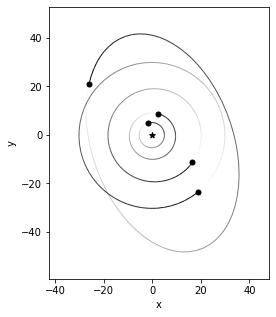

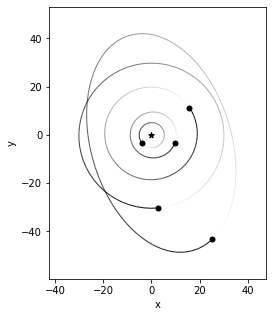

In [5]:
import sys
import commentjson as json
sys.path.insert(0, '../src')
sys.path.insert(0, '../')
import run_reb
import rebound
import numpy as np
import pandas as pd


objtype = 'DEEP'
objname = '5'
sbody = objname
flag, epoch, sim = run_reb.initialize_simulation(planets=['jupiter','saturn','uranus','neptune'],des=objname,clones=0, folder = objtype)
op = rebound.OrbitPlot(sim)
com = sim.calculate_com()

p = sim.particles[sbody+"_bf"]
o = p.calculate_orbit(com)
r2d = 180./np.pi
    
tmax = 1e5
tout = 1e2
filetype= 'DEEP'

sim = run_reb.run_simulation(sim, tmax=tmax, tout=tout,filename="archive_test.bin",deletefile=True,mindist=20.)
op = rebound.OrbitPlot(sim)
print(sim.)

In [8]:
print(sim.particles[0])
print(sim.particles[1])
print(sim.particles[2])
print(sim.particles[3])
print(sim.particles[4])
print(sim.particles[5])
print(sim.particles[5].a)

<rebound.particle.Particle object at 0x7f2e2c233510, m=1.000005976998622 x=0.00018564801970157656 y=0.005202362928013818 z=-5.430673340523921e-07 vx=-0.0018300921447360439 vy=0.0015136292895683657 vz=4.3518148988818033e-05>
<rebound.particle.Particle object at 0x7f2e2c233510, m=0.0009547919099366 x=-3.974479681302004 y=-3.3337926705624104 z=0.09843810286035572 vx=1.6979999631784903 vy=-2.1745194270127843 vz=-0.02802093456924574>
<rebound.particle.Particle object at 0x7f2e2c233510, m=0.0002858856700231 x=9.716800212536667 y=-3.3231793896290296 z=-0.35419786038501866 vx=0.6481427295315374 vy=1.7683618402083177 vz=-0.05057348402043501>
<rebound.particle.Particle object at 0x7f2e2c233510, m=4.366249613200408e-05 x=15.755259713470243 y=11.251475162425901 z=-0.4009242957429752 vx=-0.7906443322911327 vy=1.1821404802356585 vz=-0.014507641959421086>
<rebound.particle.Particle object at 0x7f2e2c233510, m=5.151383772628657e-05 x=2.782631179860047 y=-30.293488982306787 z=0.4915303461690705 vx=1.12

In [14]:
from bin_to_df import bin_to_df
folder = 'DEEP'
filename = '2'
fullfile = 'Sims/'+str(folder)+ '/' + str(filename)+'/archive.bin'
print(fullfile)
arc1 = rebound.SimulationArchive(fullfile)
series = bin_to_df(folder,filename,arc1)
print(series)

Sims/DEEP/2/archive.bin


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


                  t          a       ecc         an      eccn         inc  \
0      0.000000e+00  47.404197  0.161596  30.063787  0.008725  113.936767   
1      1.000040e+04  47.414385  0.161897  30.067090  0.010290  113.929110   
2      2.000000e+04  47.413803  0.161602  30.056058  0.009562  113.925168   
3      3.000000e+04  47.419789  0.161942  30.063396  0.010115  113.921486   
4      4.000000e+04  47.409796  0.161433  30.067997  0.011149  113.923222   
...             ...        ...       ...        ...       ...         ...   
9996   9.996000e+07  47.402925  0.162172  30.063193  0.011409  115.962432   
9997   9.997000e+07  47.408398  0.162008  30.066643  0.011113  115.962047   
9998   9.998000e+07  47.435765  0.162862  30.060988  0.010627  115.954254   
9999   9.999000e+07  47.410524  0.162159  30.063530  0.011504  115.971252   
10000  1.000000e+08  47.404975  0.162168  30.065051  0.010703  115.979525   

              p         q         h         k  ...        hu        ku  \
0

In [ ]:
import numpy as np
import pandas as pd
import rebound
import os
import matplotlib.pyplot as plt
import bin_to_df

catalog = pd.read_csv('TNOs_new_data.csv')
megno = np.zeros(len(catalog))
for i in range(len(catalog)):
    try:
        fullfile = 'Sims/TNOs_new/'+str(i)+'/archive_hires.bin'
        #print(fullfile)
        arc1 = rebound.SimulationArchive(fullfile)
        print(arc1)
        data = bin_to_df.bin_to_df('TNOs_new',str(i),arc1,catalog,'4planet')
    
        print(data)
        print(data['megno'])
    except:
        print('Failed')
        continue

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
15760
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  43.932618  0.069380  30.067476  0.008685  2.185516   
1      2.500000e+03  43.941606  0.069184  30.056781  0.008892  2.178637   
2      5.000400e+03  43.928240  0.069253  30.072663  0.009740  2.172053   
3      7.500400e+03  43.955594  0.069272  30.057541  0.009161  2.164390   
4      1.000040e+04  43.938990  0.069271  30.066720  0.010345  2.159271   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  43.927238  0.074599  30.061525  0.011212  3.377611   
39997  9.999250e+07  43.956774  0.075080  30.065441  0.010592  3.388535   
39998  9.999500e+07  43.943936  0.075076  30.062725  0.011758  3.397905   
39999  9.999750e+07  43.950858  0.074887  30.062220  0.010799  3.405067   
40000  1.000000e+08  43.935701  0.075365  30.064019  0.011298  3.415390   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
15789
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  39.526548  0.185687  30.067688  0.008675  5.156906   
1      2.500000e+03  39.449158  0.184619  30.056549  0.008883  5.155975   
2      5.000400e+03  39.308305  0.180985  30.072778  0.009746  5.154379   
3      7.500400e+03  39.254001  0.180138  30.057684  0.009171  5.155727   
4      1.000040e+04  39.270676  0.179968  30.066697  0.010346  5.153694   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  39.318418  0.176817  30.064251  0.011423  5.947423   
39997  9.999250e+07  39.476189  0.180322  30.061780  0.011016  5.934178   
39998  9.999500e+07  39.520450  0.180927  30.064190  0.010505  5.921581   
39999  9.999750e+07  39.561802  0.182206  30.063272  0.011439  5.914427   
40000  1.000000e+08  39.490575  0.180484  30.064059  0.010518  5.908566   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
15807
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  43.748643  0.061170  30.067801  0.008670  0.563872   
1      2.500000e+03  43.737153  0.061226  30.056511  0.008882  0.569679   
2      5.000400e+03  43.768668  0.062226  30.072924  0.009754  0.575989   
3      7.500400e+03  43.738825  0.061838  30.057707  0.009180  0.583082   
4      1.000040e+04  43.755187  0.061218  30.066637  0.010349  0.591880   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  43.747442  0.064848  30.064645  0.011101  2.845703   
39997  9.999250e+07  43.759925  0.065025  30.059013  0.011083  2.846539   
39998  9.999500e+07  43.737244  0.065349  30.064029  0.010317  2.848307   
39999  9.999750e+07  43.747533  0.065705  30.063630  0.011385  2.849956   
40000  1.000000e+08  43.749495  0.065948  30.063415  0.010531  2.851650   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
15809
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  42.188453  0.216689  30.064330  0.008725  14.045264   
1      2.500000e+03  42.199778  0.216947  30.056089  0.008911  14.041471   
2      5.000400e+03  42.317356  0.218737  30.073245  0.009698  14.032628   
3      7.500400e+03  42.371066  0.219804  30.057266  0.009072  14.027860   
4      1.000040e+04  42.371340  0.219671  30.066944  0.010298  14.024336   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  42.329541  0.182395  30.062668  0.010436  15.632682   
39997  9.999250e+07  42.370302  0.183327  30.063230  0.011221  15.638864   
39998  9.999500e+07  42.343307  0.182937  30.061811  0.011159  15.648277   
39999  9.999750e+07  42.275057  0.180863  30.065602  0.010797  15.657622   
40000  1.000000e+08  42.185193  0.179132  30.062643  0.011475  15.669719   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
15810
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  39.353666  0.117012  30.068038  0.008662  3.803099   
1      2.500000e+03  39.498840  0.120828  30.056687  0.008886  3.810129   
2      5.000400e+03  39.571000  0.123596  30.073101  0.009769  3.814859   
3      7.500400e+03  39.560068  0.122767  30.057503  0.009199  3.819267   
4      1.000040e+04  39.463423  0.119661  30.066470  0.010356  3.820651   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  39.557585  0.125597  30.064328  0.011364  2.602695   
39997  9.999250e+07  39.479978  0.122907  30.061702  0.010439  2.591192   
39998  9.999500e+07  39.366256  0.118221  30.061978  0.010917  2.573005   
39999  9.999750e+07  39.247861  0.114608  30.060864  0.011210  2.559278   
40000  1.000000e+08  39.241492  0.113807  30.065062  0.010550  2.551768   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
15836
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  36.377604  0.074099  30.067777  0.008670  6.555142   
1      2.500000e+03  36.491135  0.079895  30.056506  0.008882  6.541392   
2      5.000400e+03  36.529881  0.082429  30.072894  0.009752  6.544233   
3      7.500400e+03  36.471921  0.081097  30.057711  0.009178  6.557579   
4      1.000040e+04  36.409812  0.076610  30.066654  0.010348  6.568302   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  36.340564  0.063581  30.059497  0.010924  7.018345   
39997  9.999250e+07  36.350171  0.062103  30.064248  0.010704  7.035001   
39998  9.999500e+07  36.410701  0.065312  30.063025  0.011237  7.039326   
39999  9.999750e+07  36.537868  0.069377  30.063826  0.010358  7.040900   
40000  1.000000e+08  36.527986  0.068891  30.064197  0.011508  7.060264   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
15883
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  47.046774  0.213032  30.064909  0.008713  19.151601   
1      2.500000e+03  47.133529  0.215727  30.055749  0.008900  19.143659   
2      5.000400e+03  47.080532  0.213629  30.073325  0.009711  19.158910   
3      7.500400e+03  47.029414  0.212455  30.057228  0.009084  19.162698   
4      1.000040e+04  47.114586  0.214373  30.067299  0.010296  19.158911   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  47.080075  0.207646  30.065553  0.011307  19.144861   
39997  9.999250e+07  47.066416  0.207068  30.059017  0.011183  19.146509   
39998  9.999500e+07  47.115687  0.208783  30.064325  0.010518  19.141388   
39999  9.999750e+07  47.132296  0.209056  30.062656  0.011485  19.126942   
40000  1.000000e+08  47.042120  0.206967  30.063171  0.010583  19.135923   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
16684
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  44.067480  0.049731  30.068058  0.008662  3.744546   
1      2.500000e+03  44.064620  0.049727  30.056700  0.008886  3.737018   
2      5.000400e+03  44.083369  0.049710  30.073104  0.009771  3.728478   
3      7.500400e+03  44.072110  0.049686  30.057481  0.009201  3.720492   
4      1.000040e+04  44.083322  0.050026  30.066462  0.010356  3.713522   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  44.072107  0.038090  30.064378  0.011243  4.212121   
39997  9.999250e+07  44.069987  0.038261  30.062349  0.010793  4.213457   
39998  9.999500e+07  44.069966  0.038306  30.065387  0.010577  4.214586   
39999  9.999750e+07  44.079399  0.037767  30.062033  0.011469  4.215999   
40000  1.000000e+08  44.085234  0.037923  30.061742  0.010658  4.217288   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
19255
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  42.787710  0.033453  30.064682  0.008719  1.487301   
1      2.500000e+03  42.786078  0.032548  30.055941  0.008905  1.480600   
2      5.000400e+03  42.791699  0.032458  30.073258  0.009703  1.472452   
3      7.500400e+03  42.800285  0.032716  30.057123  0.009076  1.464416   
4      1.000040e+04  42.791268  0.032819  30.067091  0.010295  1.457141   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  42.800430  0.041700  30.065174  0.011124  0.324446   
39997  9.999250e+07  42.794129  0.041048  30.058594  0.011222  0.336587   
39998  9.999500e+07  42.796026  0.040963  30.064418  0.010458  0.349238   
39999  9.999750e+07  42.798767  0.041387  30.063742  0.011582  0.360757   
40000  1.000000e+08  42.780938  0.040937  30.063443  0.010718  0.369854   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
19299
Failed
<rebound.SimulationArchive instance, snapshots=40001 >
19308
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  43.297807  0.118974  30.067851  0.008668  27.424925   
1      2.500000e+03  43.311670  0.119660  30.056538  0.008883  27.413044   
2      5.000400e+03  43.303785  0.119513  30.072984  0.009757  27.410917   
3      7.500400e+03  43.300236  0.119516  30.057684  0.009185  27.410642   
4      1.000040e+04  43.317105  0.119913  30.066598  0.010350  27.404093   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  43.290911  0.118119  30.065276  0.010577  26.509809   
39997  9.999250e+07  43.300645  0.117952  30.063025  0.011477  26.507574   
39998  9.999500e+07  43.306681  0.118088  30.062325  0.010607  26.508525   
39999  9.999750e+07  43.289305  0.117516  30.063761  0.011463  26.515025   
40000  1.000000e+08  43.301825  0.1

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
19521
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  45.732151  0.103467  30.067126  0.008692  12.035429   
1      2.500000e+03  45.742888  0.103646  30.056880  0.008898  12.028862   
2      5.000400e+03  45.718595  0.103360  30.072720  0.009738  12.024738   
3      7.500400e+03  45.725127  0.103708  30.057540  0.009155  12.019359   
4      1.000040e+04  45.734628  0.103274  30.066785  0.010343  12.013247   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  45.702824  0.098815  30.061473  0.010912  11.919719   
39997  9.999250e+07  45.707804  0.098830  30.065729  0.011029  11.916429   
39998  9.999500e+07  45.722509  0.098702  30.062079  0.011480  11.913305   
39999  9.999750e+07  45.701931  0.099096  30.064648  0.010506  11.912412   
40000  1.000000e+08  45.698323  0.099014  30.061178  0.011398  11.910870   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
20000
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  42.947809  0.053910  30.067851  0.008668  17.175091   
1      2.500000e+03  42.939579  0.054491  30.056538  0.008883  17.171005   
2      5.000400e+03  42.951964  0.054903  30.072984  0.009757  17.166097   
3      7.500400e+03  42.955861  0.054250  30.057684  0.009185  17.159724   
4      1.000040e+04  42.965411  0.055056  30.066598  0.010350  17.159570   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  42.943587  0.050838  30.065276  0.010577  16.496008   
39997  9.999250e+07  42.956702  0.050221  30.063025  0.011477  16.504200   
39998  9.999500e+07  42.967204  0.050820  30.062325  0.010607  16.510496   
39999  9.999750e+07  42.953927  0.050528  30.063761  0.011463  16.516037   
40000  1.000000e+08  42.962194  0.050413  30.061715  0.010754  16.524012   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
20108
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  39.454175  0.146121  30.065222  0.008712  19.556892   
1      2.500000e+03  39.426477  0.145847  30.056074  0.008909  19.573570   
2      5.000400e+03  39.385679  0.143591  30.073498  0.009726  19.591077   
3      7.500400e+03  39.368438  0.142725  30.057296  0.009101  19.610617   
4      1.000040e+04  39.329048  0.141191  30.067235  0.010308  19.630043   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  39.379783  0.170487  30.064849  0.010686  20.113470   
39997  9.999250e+07  39.369915  0.170123  30.062225  0.011418  20.129677   
39998  9.999500e+07  39.329684  0.169428  30.065050  0.010570  20.145900   
39999  9.999750e+07  39.373804  0.169549  30.063481  0.011678  20.147483   
40000  1.000000e+08  39.393354  0.170154  30.062770  0.010899  20.152170   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
24835
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  41.796564  0.104508  30.067764  0.008671  27.044107   
1      2.500000e+03  41.789871  0.104299  30.056506  0.008882  27.035932   
2      5.000400e+03  41.791808  0.104934  30.072876  0.009751  27.025188   
3      7.500400e+03  41.805886  0.104883  30.057712  0.009177  27.019963   
4      1.000040e+04  41.776676  0.104008  30.066662  0.010348  27.022502   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  41.792494  0.099926  30.062168  0.011664  28.200257   
39997  9.999250e+07  41.784922  0.100326  30.063984  0.010532  28.203360   
39998  9.999500e+07  41.793457  0.100081  30.064501  0.011354  28.198692   
39999  9.999750e+07  41.782911  0.100667  30.062045  0.010644  28.199563   
40000  1.000000e+08  41.794373  0.100590  30.062969  0.010839  28.200444   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
24952
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  39.356534  0.226074  30.067815  0.008669  16.564269   
1      2.500000e+03  39.254438  0.224179  30.056516  0.008882  16.560167   
2      5.000400e+03  39.258436  0.224143  30.072942  0.009755  16.551510   
3      7.500400e+03  39.350827  0.226169  30.057702  0.009182  16.544000   
4      1.000040e+04  39.460623  0.227319  30.066626  0.010349  16.541581   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  39.380304  0.237314  30.060451  0.010973  16.845111   
39997  9.999250e+07  39.273854  0.235083  30.064890  0.010542  16.835101   
39998  9.999500e+07  39.258484  0.235272  30.063050  0.011364  16.822191   
39999  9.999750e+07  39.357144  0.237135  30.063994  0.010466  16.806509   
40000  1.000000e+08  39.438667  0.238340  30.064254  0.011493  16.802066   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
24978
                  t          a       ecc         an      eccn       inc  \
0      0.000000e+00  43.320620  0.048821  30.064900  0.008714  2.393678   
1      2.500000e+03  43.316062  0.048024  30.055753  0.008900  2.385058   
2      5.000400e+03  43.293773  0.048184  30.073319  0.009710  2.377504   
3      7.500400e+03  43.313246  0.048367  30.057219  0.009084  2.368618   
4      1.000040e+04  43.298232  0.047652  30.067294  0.010296  2.359474   
...             ...        ...       ...        ...       ...       ...   
39996  9.999000e+07  43.277595  0.055053  30.064762  0.011545  1.959659   
39997  9.999250e+07  43.284202  0.054414  30.059132  0.011015  1.961779   
39998  9.999500e+07  43.297668  0.055628  30.065166  0.010703  1.963901   
39999  9.999750e+07  43.285621  0.054822  30.062278  0.011440  1.966165   
40000  1.000000e+08  43.296907  0.054853  30.065031  0.010603  1.968373   

              p         q         h   

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
28978
                  t          a       ecc         an      eccn        inc  \
0      0.000000e+00  39.499133  0.244047  30.066576  0.008694  19.630118   
1      2.500000e+03  39.497181  0.243790  30.056801  0.008901  19.628934   
2      5.000400e+03  39.455358  0.242888  30.072885  0.009736  19.632850   
3      7.500400e+03  39.335041  0.241420  30.057625  0.009141  19.635794   
4      1.000040e+04  39.288882  0.240178  30.067005  0.010335  19.643599   
...             ...        ...       ...        ...       ...        ...   
39996  9.999000e+07  39.302710  0.263666  30.061907  0.010843  16.145574   
39997  9.999250e+07  39.282156  0.263192  30.066200  0.011009  16.149449   
39998  9.999500e+07  39.362247  0.264239  30.061018  0.011577  16.147733   
39999  9.999750e+07  39.463032  0.266077  30.062234  0.010825  16.147900   
40000  1.000000e+08  39.481335  0.266151  30.062811  0.011734  16.149309   

              p         q 

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


<rebound.SimulationArchive instance, snapshots=40001 >
32929


In [14]:
import numpy as np
import pandas as pd
import rebound
import os
import matplotlib.pyplot as plt
import bin_to_df
catalog = pd.read_csv('AstFam_new_data.csv')
megno = np.zeros(len(catalog))
for i in range(2):
    fullfile = 'Sims/AstFam_new/'+str(i)+'/archive_hires.bin'
        #print(fullfile)
    arc1 = rebound.SimulationArchive(fullfile)
    sbody = str(catalog['Name'].iloc[int(i)])
    print(sbody)
    print(len(arc1))
    for j,sim in enumerate(arc1):
        tp = sim.particles[sbody+"_bf"]
        print(tp)
        megno = sim.calculate_megno()
        print(megno)


1
1
<rebound.particle.Particle object at 0x7f483589d840, m=0.0 x=1.0038103449319136 y=-2.7152901096229454 z=-0.27146435664085444 vx=3.357879216759256 vy=1.0873102562363517 vz=-0.585109892747175>
0.0
2
1
<rebound.particle.Particle object at 0x7f483589d730, m=0.0 x=-2.059215353890383 y=0.7190576923984224 z=-0.32440239291212514 vx=-2.1073064774864663 vy=-3.3326218368982063 vz=2.4716890020544096>
0.0


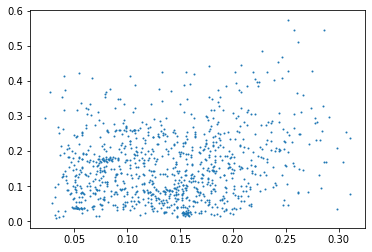

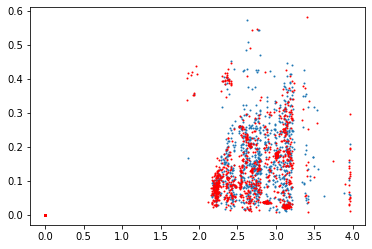

In [32]:
families = pd.read_csv('data_files/prop_elem_AstFam_families_multi_sec_hires.csv')

ind_rem = np.where(families['calc_ecc'] != 0)[0]
ind_rem2 = np.where(families['ast_ecc'] < 1)[0]

ind_rem = np.intersect1d(ind_rem,ind_rem2)
plt.scatter(families['calc_ecc'][ind_rem],families['calc_sinI'][ind_rem],s=1)
#plt.scatter(families['calc_ecc'][1014:],families['calc_sinI'][1014:],s=1,c='r')
plt.show()

ind_rem = np.intersect1d(ind_rem,ind_rem2)
plt.scatter(families['calc_sma'][ind_rem],families['calc_sinI'][ind_rem],s=1)
plt.scatter(families['calc_sma'][1014:],families['calc_sinI'][1014:],s=1,c='r')
plt.show()